## Loading datasets and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [2]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [3]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [4]:
customers.duplicated().sum()

0

In [5]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [6]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
products.duplicated().sum()

0

In [8]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [9]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [10]:
transactions.duplicated().sum()

0

No null value in any dataset and no dataset contain any duplicate

## Merging Datasets

In [11]:
combined_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Display basic information
print("Combined Dataset Info:")
combined_data.info()

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [12]:
combined_data.duplicated().sum()

0

In [13]:
print("\nSummary Statistics:")
combined_data.describe()


Summary Statistics:


,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


## EDA

## 1) Regions by Total Value

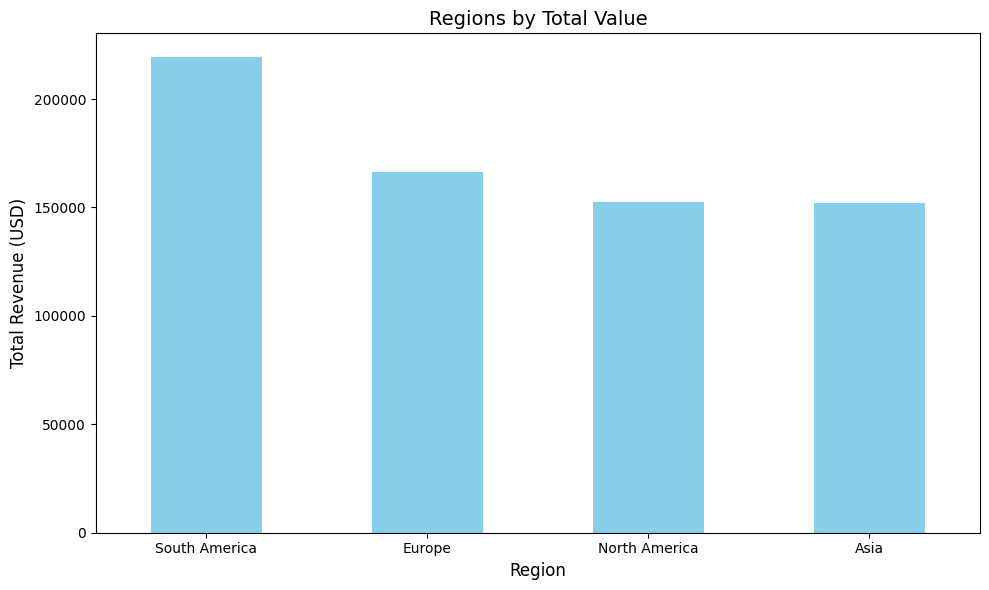

In [14]:
# Top 10 countries by total value
top_countries = combined_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Bar graph
plt.figure(figsize=(10, 6))
top_countries.plot(kind="bar", color="skyblue")
plt.title("Regions by Total Value", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### South America contributes the most in total revenue followed by Europe, North America and Asia

## 2) 5 Most Popular Products by Quantity Sold in each Region

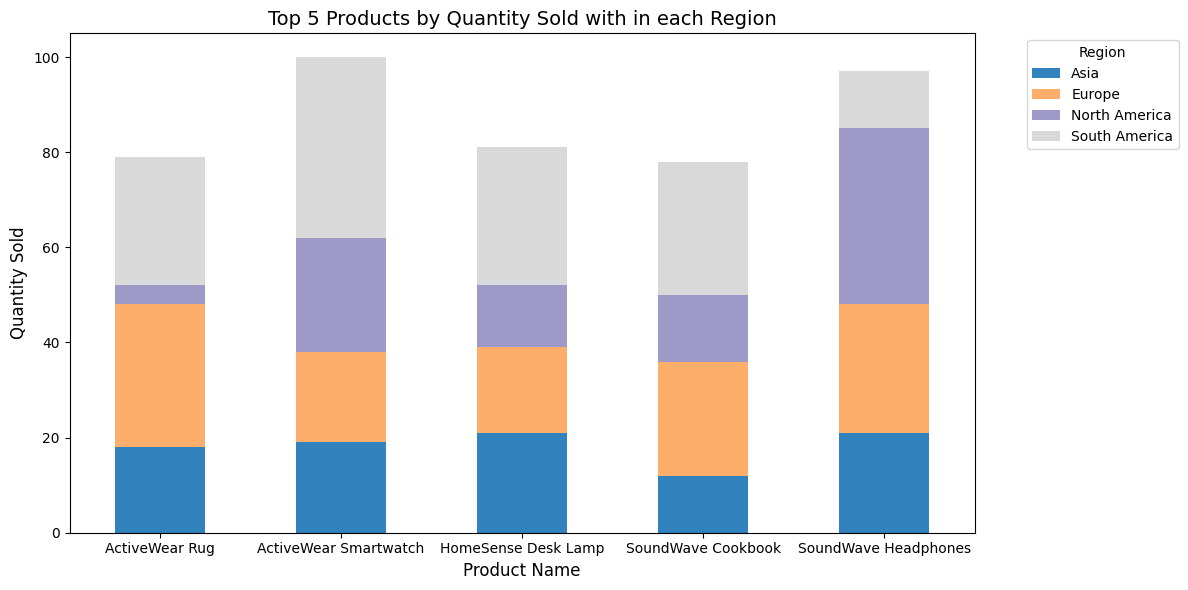

In [15]:
# Top 5 products by quantity sold
top_products = combined_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)

# Regions for these products
top_products_data = combined_data[combined_data["ProductName"].isin(top_products.index)]
product_region_data = top_products_data.groupby(["ProductName", "Region"])["Quantity"].sum().unstack(fill_value=0)

# Stacked bar graph
product_region_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20c")
plt.title("Top 5 Products by Quantity Sold with in each Region", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Top 5 products sold are
1) ActiveWear Rug - sold most in Europe and South America
2) ActiveWear SmartWatch - sold most in South America
3) HomeSense Desp Lamp - sold most in South America
4) Soundwave Cookbook - sold most in Europe and South America
5) Soundwave Headphones - sold most in North America

## 3) Categories by Total Revenue

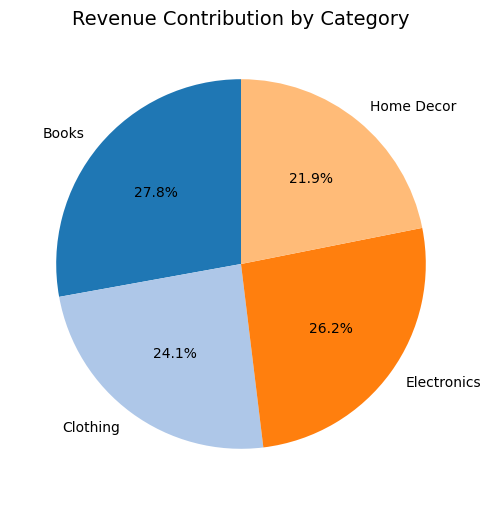

In [16]:
# Revenue by category
category_revenue = combined_data.groupby("Category")["TotalValue"].sum()

# Pie chart
plt.figure(figsize=(8, 6))
category_revenue.plot(kind="pie", autopct="%.1f%%", startangle=90, colors=sns.color_palette("tab20"))
plt.title("Revenue Contribution by Category", fontsize=14)
plt.ylabel("")  # Remove y-axis label
plt.show()


### Each category (Electronics, Home Decor, Books and Clothing) contributes almost equally in total revenue

## 4) Number of units Sold in Each Category by Region

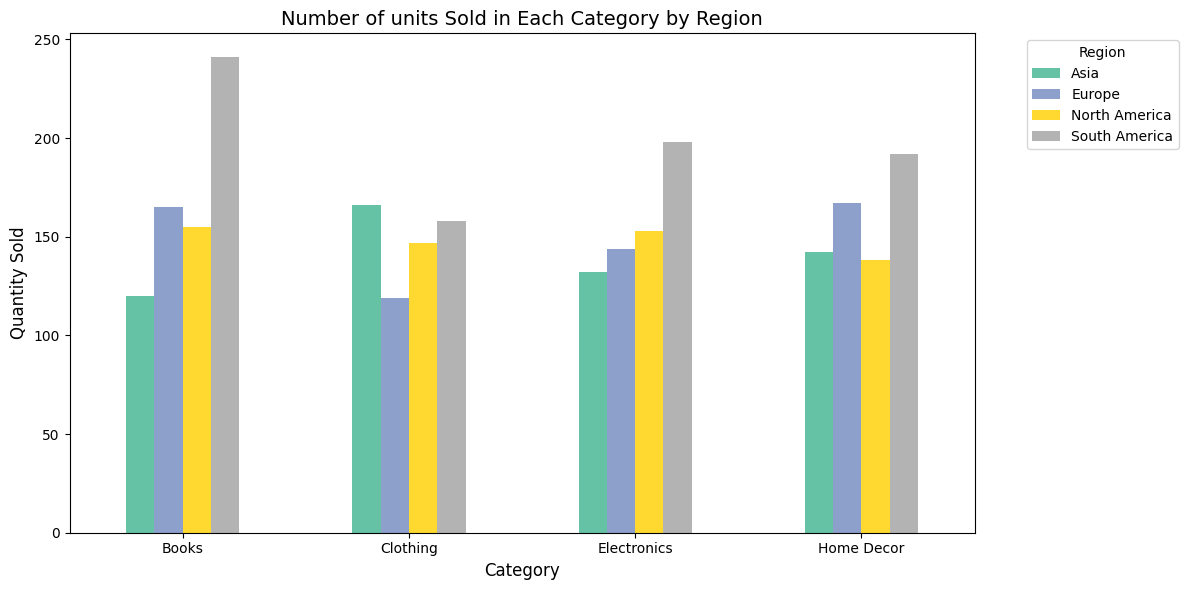

In [17]:
# Top 5 categories by quantity sold
top_categories = combined_data.groupby("Category")["Quantity"].sum().sort_values(ascending=False).head(5)

# Regions for these categories
top_categories_data = combined_data[combined_data["Category"].isin(top_categories.index)]
category_region_data = top_categories_data.groupby(["Category", "Region"])["Quantity"].sum().unstack(fill_value=0)

# Bar graph
category_region_data.plot(kind="bar", figsize=(12, 6), colormap="Set2")
plt.title("Number of units Sold in Each Category by Region", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Books, Home Decor, and Electronics are most sold in South America while Clothing is most sold in Asia closely followed by South America

## 5) Signup Trend Over Time

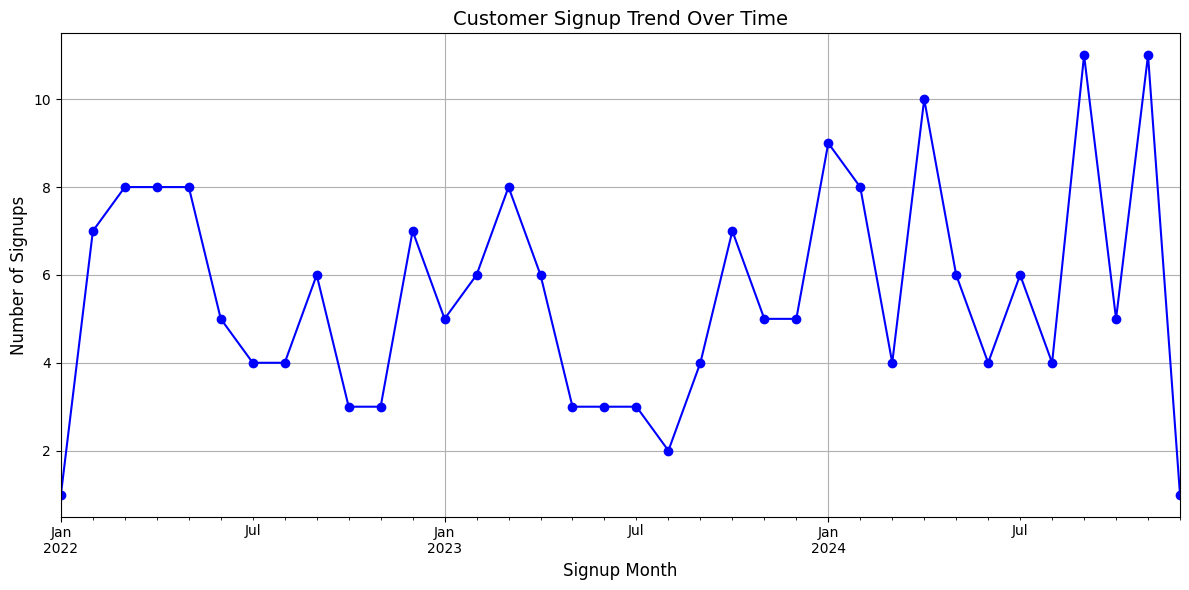

In [18]:
# Convert SignupDate to datetime
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

# Signup trend over time
signup_trend = customers.groupby(customers["SignupDate"].dt.to_period("M")).size()

# Line graph
signup_trend.plot(kind="line", marker="o", figsize=(12, 6), color="blue")
plt.title("Customer Signup Trend Over Time", fontsize=14)
plt.xlabel("Signup Month", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Number of signups were the least in the month of August in 2023 and highest in the month of September and November in 2024

## 6) Total Revenue in Each Month

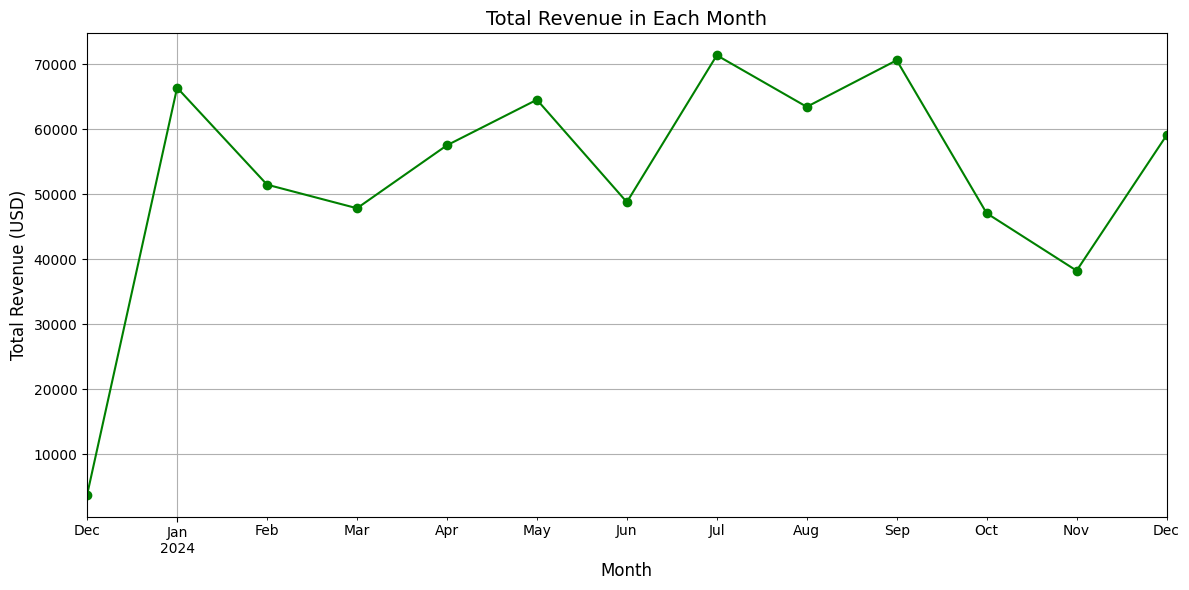

In [19]:
# Convert TransactionDate to datetime
combined_data["TransactionDate"] = pd.to_datetime(combined_data["TransactionDate"])

# Revenue by month
monthly_revenue = combined_data.groupby(combined_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()

# Line graph
monthly_revenue.plot(kind="line", marker="o", figsize=(12, 6), color="green")
plt.title("Total Revenue in Each Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Total revenue was maximum in the month of July and September and was least in the month of november 2024 even though it had most number of signups

## 7) Top Categories Sold in Each Month

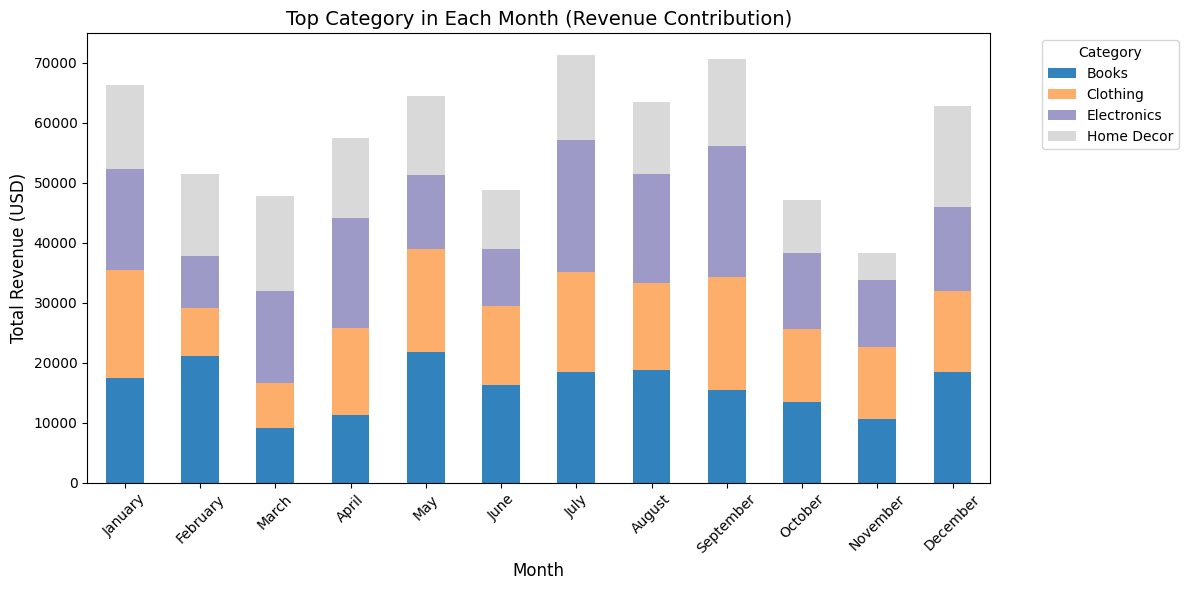

In [20]:
# Add month names to the TransactionMonth column
combined_data["TransactionMonth"] = combined_data["TransactionDate"].dt.to_period("M")
combined_data["MonthName"] = combined_data["TransactionDate"].dt.strftime("%B")

# Revenue by month and category
monthly_category_revenue = combined_data.groupby(["MonthName", "Category"])["TotalValue"].sum().unstack(fill_value=0)

# Ensure months are sorted in calendar order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_category_revenue = monthly_category_revenue.reindex(month_order)

# Stacked bar graph
monthly_category_revenue.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20c")
plt.title("Top Category in Each Month (Revenue Contribution)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top categories sold in each month are :
1) January : Clothing
2) February : Books
3) March : Home Decor
4) April : Electronics
5) May : Books
6) June : Books
7) July : Electronics
8) August : Books
9) September : Electronics
10) October : Books
11) November : Clothing
12) December : Books